In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.read_excel('data.xlsx')

In [10]:
data

,组,性别（1=女，2=男）,年龄,教育程度,病程,肉毒素注射时间,HAMA,JRS严重度,BFMDRS,TWSTRS严重度,cdip-58,zALFF,zfALFF,zReHo,mean FD_Jenkinson
0,1,1,50,6,0.58,0.25,11,3.0,8.0,NaN,NaN,0.082416,0.773313,0.670707,0.0472
1,1,2,38,16,1.00,0.00,13,4.0,9.5,NaN,NaN,-0.471775,0.198549,-0.197457,0.0972
2,1,1,68,9,10.00,1.00,14,2.0,4.5,NaN,NaN,-0.229917,1.136338,0.484817,0.0619
3,1,1,48,6,6.00,4.00,14,4.0,9.0,NaN,NaN,-0.260167,0.716709,0.505753,0.1180
4,1,1,59,6,1.60,0.00,14,4.0,6.0,NaN,NaN,-0.257194,0.250606,0.499523,0.0946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2,2,35,9,10.00,0.00,2,NaN,NaN,11.0,36.90,-0.646083,-0.075403,-0.141716,0.0346
65,2,2,49,16,2.00,0.00,3,NaN,NaN,7.0,55.17,-0.414735,0.073898,0.201727,0.1650
66,2,2,22,16,8.00,0.00,1,NaN,NaN,17.0,24.14,-0.525392,0.016164,-0.167510,0.2080
67,2,1,31,12,7.00,7.00,1,NaN,NaN,19.0,28.62,-0.396799,-0.287801,0.071604,0.1120


In [11]:
features = data[["zALFF", "zfALFF", "zReHo"]]
target = data["组"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()  # 创建一个标准化的数据预处理器
X_train_scaled = scaler.fit_transform(X_train)  # 对训练集进行标准化
X_test_scaled = scaler.transform(X_test)  # 对测试集进行标准化

In [14]:
regressor = LogisticRegression()  # 创建一个逻辑回归模型
regressor.fit(X_train_scaled, y_train)  # 在标准化后的训练集上拟合模型

LogisticRegression()

In [15]:
y_pred = regressor.predict(X_test_scaled)  # 对标准化后的测试集进行预测
accuracy = regressor.score(X_test_scaled, y_test)  # 计算准确率

In [16]:
accuracy

0.7142857142857143

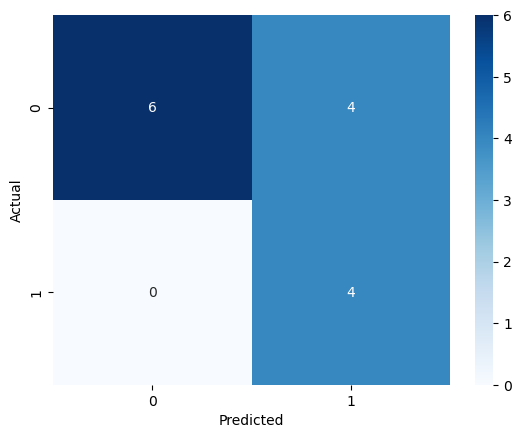

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc

# 计算ROC曲线和AUC
y_pred_prob = regressor.predict_proba(X_test_scaled)[:, 1]  # 需要模型支持概率预测
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
```

这段代码使用ROC曲线和AUC来评估分类模型的性能。ROC曲线越靠近左上角且AUC值越接近1，表示模型具有更好的性能。

SyntaxError: invalid syntax (3315075046.py, line 18)